# Breast Cancer Detection using Random Forest

#### Import All Required Libraries

In [3]:
# ==============================================
# 🧪 Breast Cancer Detection using Random Forest
# ==============================================

# 🔇 Suppress warnings that may appear during execution
import warnings  # Handles warning messages from libraries
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignores future warnings to keep output clean

# ------------------------------------------
# 📦 Data Handling and Numerical Computing
# ------------------------------------------
import pandas as pd  # For working with tabular data (DataFrames)
import numpy as np  # For numerical operations, arrays, and mathematical functions

# ------------------------------------------
# 📊 Data Visualization
# ------------------------------------------
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns  # For enhanced statistical data visualizations based on matplotlib

# ------------------------------------------
# 📚 Scikit-learn: Dataset and Preprocessing
# ------------------------------------------
from sklearn.datasets import load_breast_cancer  # Load the built-in Breast Cancer dataset
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardize features (optional for Random Forest, but useful for analysis)

# ------------------------------------------
# 🧠 Machine Learning Model
# ------------------------------------------
from sklearn.ensemble import RandomForestClassifier  # Ensemble classifier using multiple decision trees (Random Forest)

# ------------------------------------------
# 📈 Model Evaluation
# ------------------------------------------
from sklearn.metrics import accuracy_score  # Metric to measure the accuracy of the model
from sklearn.metrics import confusion_matrix  # Create a confusion matrix to see prediction errors
from sklearn.metrics import classification_report  # Generate precision, recall, F1-score, and support

# ✅ All essential libraries are now imported and documented.


In [4]:
# Set visual style for the plots
sns.set(style='whitegrid')  # 'seaborn' is used for creating more visually appealing plots. 'whitegrid' style adds a white background with grid lines, making it easier to interpret graphs.


## Load the Breast Cancer Dataset

In [5]:
# ===================================
# Load the Breast Cancer Dataset
# ===================================

# The 'load_breast_cancer()' function loads the Breast Cancer dataset from scikit-learn's built-in datasets.
# It returns a dictionary-like object with features, target, and metadata.
data = load_breast_cancer()  # Load the dataset

# Convert the dataset into a pandas DataFrame for better readability and easier data manipulation.
# 'data.data' contains the feature values (30 numeric attributes).
# 'data.feature_names' contains the column names for these features.
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame.
# 'data.target' contains the classification labels: 0 = malignant (cancerous), 1 = benign (non-cancerous).
df['target'] = data.target


## Basic Dataset Information

In [6]:
#  – Basic Dataset Information

#  Display the first 5 rows of the dataset
# This helps understand the structure and preview sample records
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
#  Show the shape of the dataset
# (Number of rows = instances, Number of columns = features + target)
df.shape



(569, 31)

In [8]:
#  Display dataset information
# Includes column names, data types, non-null counts, and memory usage
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
#  Show descriptive statistics for all numerical features
# Includes mean, std, min, max, and quartiles
df.describe().T  # Transpose to make it easier to read by column



,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
#  Check for missing values in each column
# Should return all zeros if no missing data exists
df.isnull().sum()



mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [11]:
#  Check for duplicate rows in the dataset
# Duplicate rows can negatively affect the model and need to be removed
df.duplicated().sum()



np.int64(0)

In [12]:
#   Display unique values in the target column
# Verifies that it's a binary classification (0 = malignant, 1 = benign)
df['target'].unique()



array([0, 1])

In [13]:
#   Check for constant features
# Features with only one unique value offer no predictive power
[col for col in df.columns if df[col].nunique() == 1]


[]

In [14]:
#   Distribution of Target Labels (Malignant = 0, Benign = 1)

#  1. Display the value counts of each class label
# This shows how many malignant and benign samples are present in the dataset
df['target'].value_counts()


target
1    357
0    212
Name: count, dtype: int64

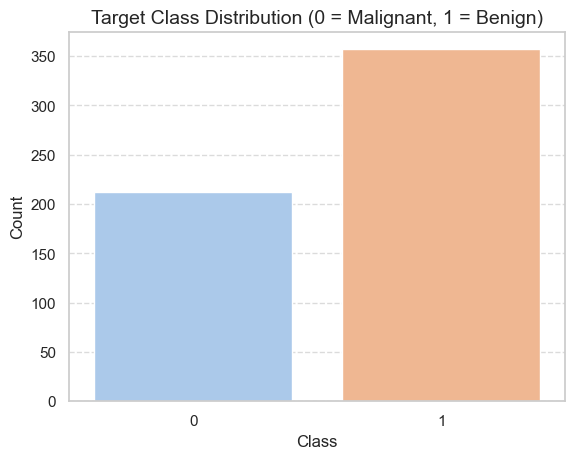

In [15]:
# Plot a count plot to visualize class distribution
# Helps easily identify class imbalance visually
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Target Class Distribution (0 = Malignant, 1 = Benign)', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
# Calculate the percentage of each class
# Useful when you want to understand how balanced your dataset is
target_counts = df['target'].value_counts()
target_percentages = target_counts / len(df) * 100  # Convert to percentages

# Combine into a clean DataFrame for display
target_distribution = pd.DataFrame({
    'Class': ['Benign (1)', 'Malignant (0)'] if target_counts.index[0] == 1 else ['Malignant (0)', 'Benign (1)'],
    'Count': target_counts.values,
    'Percentage': target_percentages.values.round(2)
})

# Display the distribution summary
target_distribution


,Class,Count,Percentage
0,Benign (1),357,62.74
1,Malignant (0),212,37.26


In [17]:
#  Feature Correlation Matrix

# 📌 1. Compute the correlation matrix
# This measures the linear relationship between numeric features (ranges from -1 to 1)
correlation_matrix = df.corr(numeric_only=True)

# Display top 5 rows of the correlation matrix
correlation_matrix.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


##### Correlation with Target (Top 10 Correlated Features)

Top 10 features most correlated with target:
 worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: target, dtype: float64


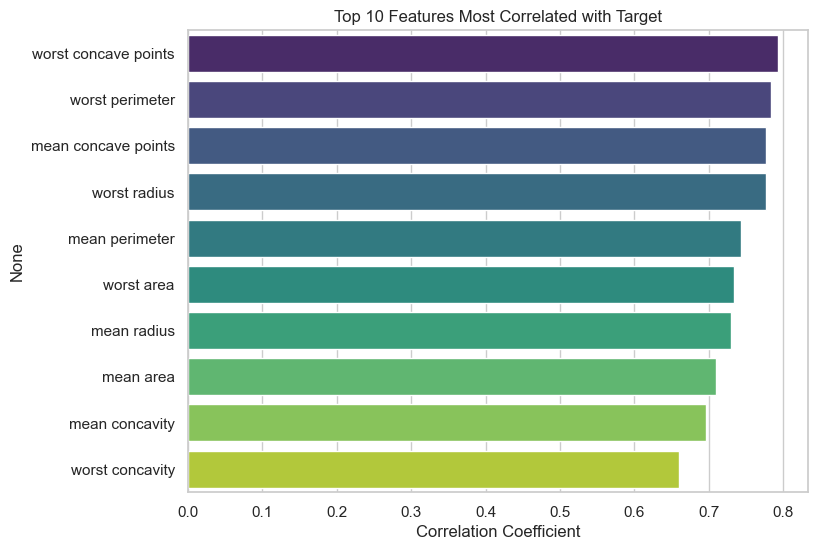

In [18]:
# Find the absolute correlation of each feature with the target
correlation_with_target = df.corr()['target'].abs().sort_values(ascending=False)

# Display top 10 most influential features
top_corr_features = correlation_with_target[1:11]  # exclude 'target' itself
print("Top 10 features most correlated with target:\n", top_corr_features)

# Visualize top correlated features
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='viridis')
plt.title('Top 10 Features Most Correlated with Target')
plt.xlabel('Correlation Coefficient')
plt.show()


In [19]:
#  Check how strongly each feature correlates with the target (malignant/benign)
# Helps identify important predictive features
target_corr = correlation_matrix['target'].sort_values(ascending=False)

# Display top 10 features most positively correlated with the target
target_corr.head(10)


target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
Name: target, dtype: float64

In [20]:
#  Filter features that have high correlation with target (above 0.5 or below -0.5)
# This is useful to select features for model training
strong_corr_features = target_corr[(target_corr > 0.5) | (target_corr < -0.5)]

# Display the strong features
strong_corr_features


target                  1.000000
area error             -0.548236
perimeter error        -0.556141
radius error           -0.567134
worst compactness      -0.590998
mean compactness       -0.596534
worst concavity        -0.659610
mean concavity         -0.696360
mean area              -0.708984
mean radius            -0.730029
worst area             -0.733825
mean perimeter         -0.742636
worst radius           -0.776454
mean concave points    -0.776614
worst perimeter        -0.782914
worst concave points   -0.793566
Name: target, dtype: float64

## Correlation Matrix Heatmap

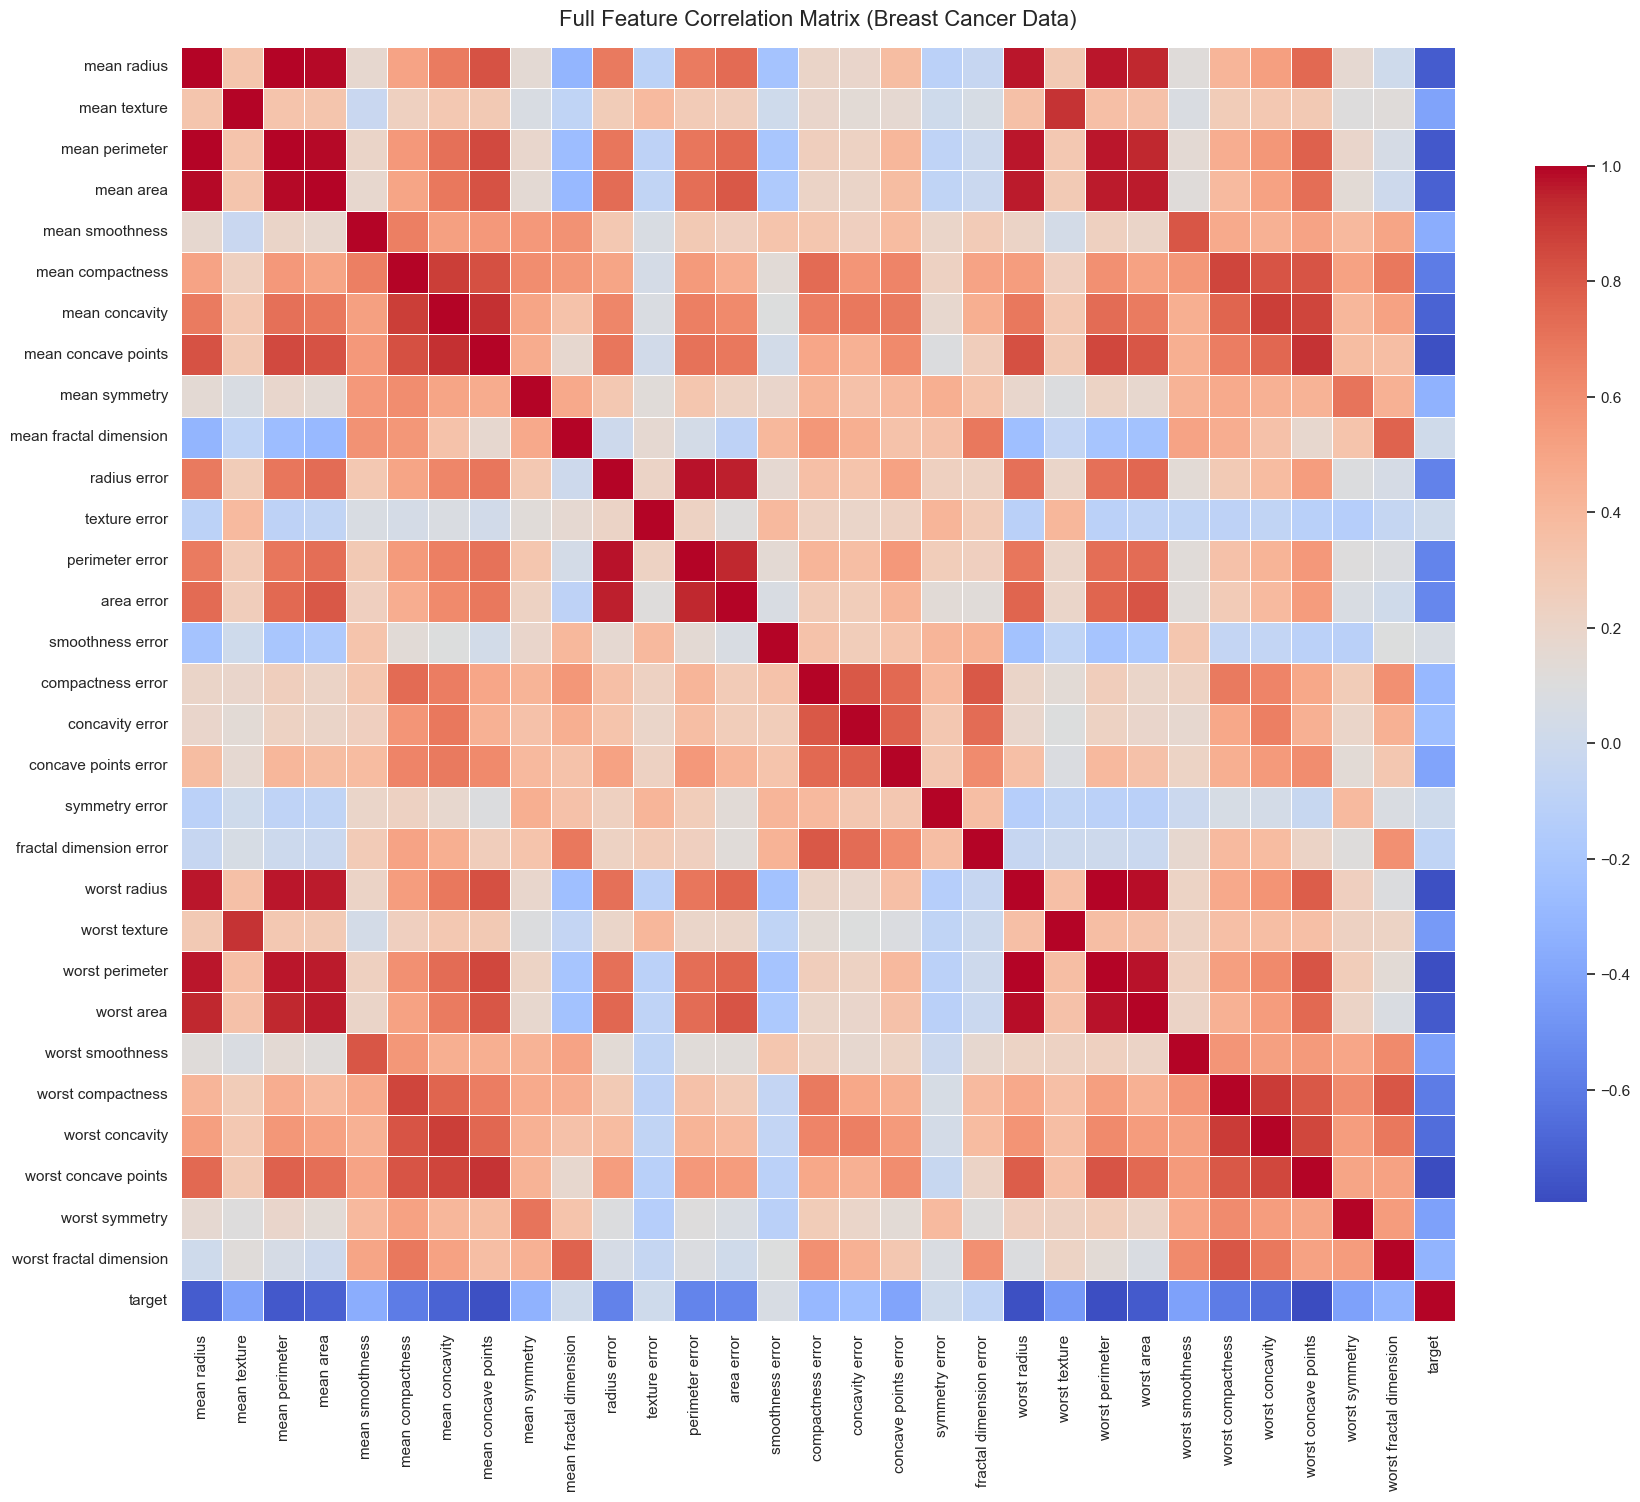

Top 10 Features Positively Correlated with Target:


target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
Name: target, dtype: float64


Top 10 Features Negatively Correlated with Target:


worst concavity        -0.659610
mean concavity         -0.696360
mean area              -0.708984
mean radius            -0.730029
worst area             -0.733825
mean perimeter         -0.742636
worst radius           -0.776454
mean concave points    -0.776614
worst perimeter        -0.782914
worst concave points   -0.793566
Name: target, dtype: float64

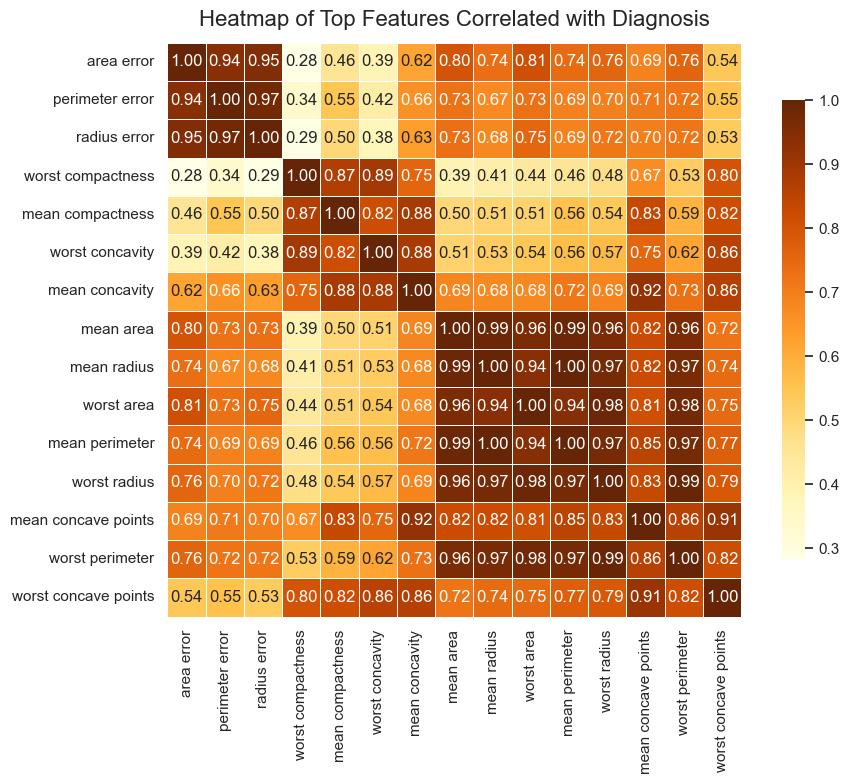

In [21]:
# Correlation Matrix Heatmap
# Correlation helps us understand how features relate to each other.
# In classification problems like this, it also helps identify multicollinearity and important predictors.

#  Compute the correlation matrix of all features
correlation_matrix = df.corr(numeric_only=True)  # Computes Pearson correlation

#  Plot the full correlation matrix as a heatmap
plt.figure(figsize=(18, 15))  # Make the heatmap large enough for clarity

# Heatmap of correlations using seaborn
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',           # Color palette for better contrast
            annot=False,               # Set to True to annotate every cell with correlation value
            fmt='.2f',                 # Format of correlation coefficients
            linewidths=0.5,            # Add lines between cells for readability
            cbar_kws={"shrink": 0.8},  # Shrink color bar for aesthetics
            square=True)

# Add plot title
plt.title("Full Feature Correlation Matrix (Breast Cancer Data)", fontsize=16, pad=15)

# Optimize layout
plt.tight_layout()
plt.show()

#  Explore how the features correlate with the target
# This helps us find which features are most useful for predicting 'malignant' vs 'benign'

# Sort correlation of each feature with the target variable
target_corr = correlation_matrix['target'].sort_values(ascending=False)

# Display top positively and negatively correlated features with the target
print("Top 10 Features Positively Correlated with Target:")
display(target_corr.head(11))  # Includes 'target' itself, which has correlation 1.0

print("\nTop 10 Features Negatively Correlated with Target:")
display(target_corr.tail(10))

#  Extract features with strong absolute correlation with target (> 0.5)
strong_corr_features = target_corr[abs(target_corr) > 0.5]
strong_corr_features = strong_corr_features.drop('target')  # Drop 'target' itself from the list

#  Visualize the correlation among these strong features
plt.figure(figsize=(10, 8))

sns.heatmap(df[strong_corr_features.index].corr(), 
            annot=True,
            cmap='YlOrBr',  # Yellow-Orange-Brown palette for variation
            fmt=".2f",
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": .8})

plt.title('Heatmap of Top Features Correlated with Diagnosis', fontsize=16, pad=12)
plt.tight_layout()
plt.show()


## Boxplot of Key Features

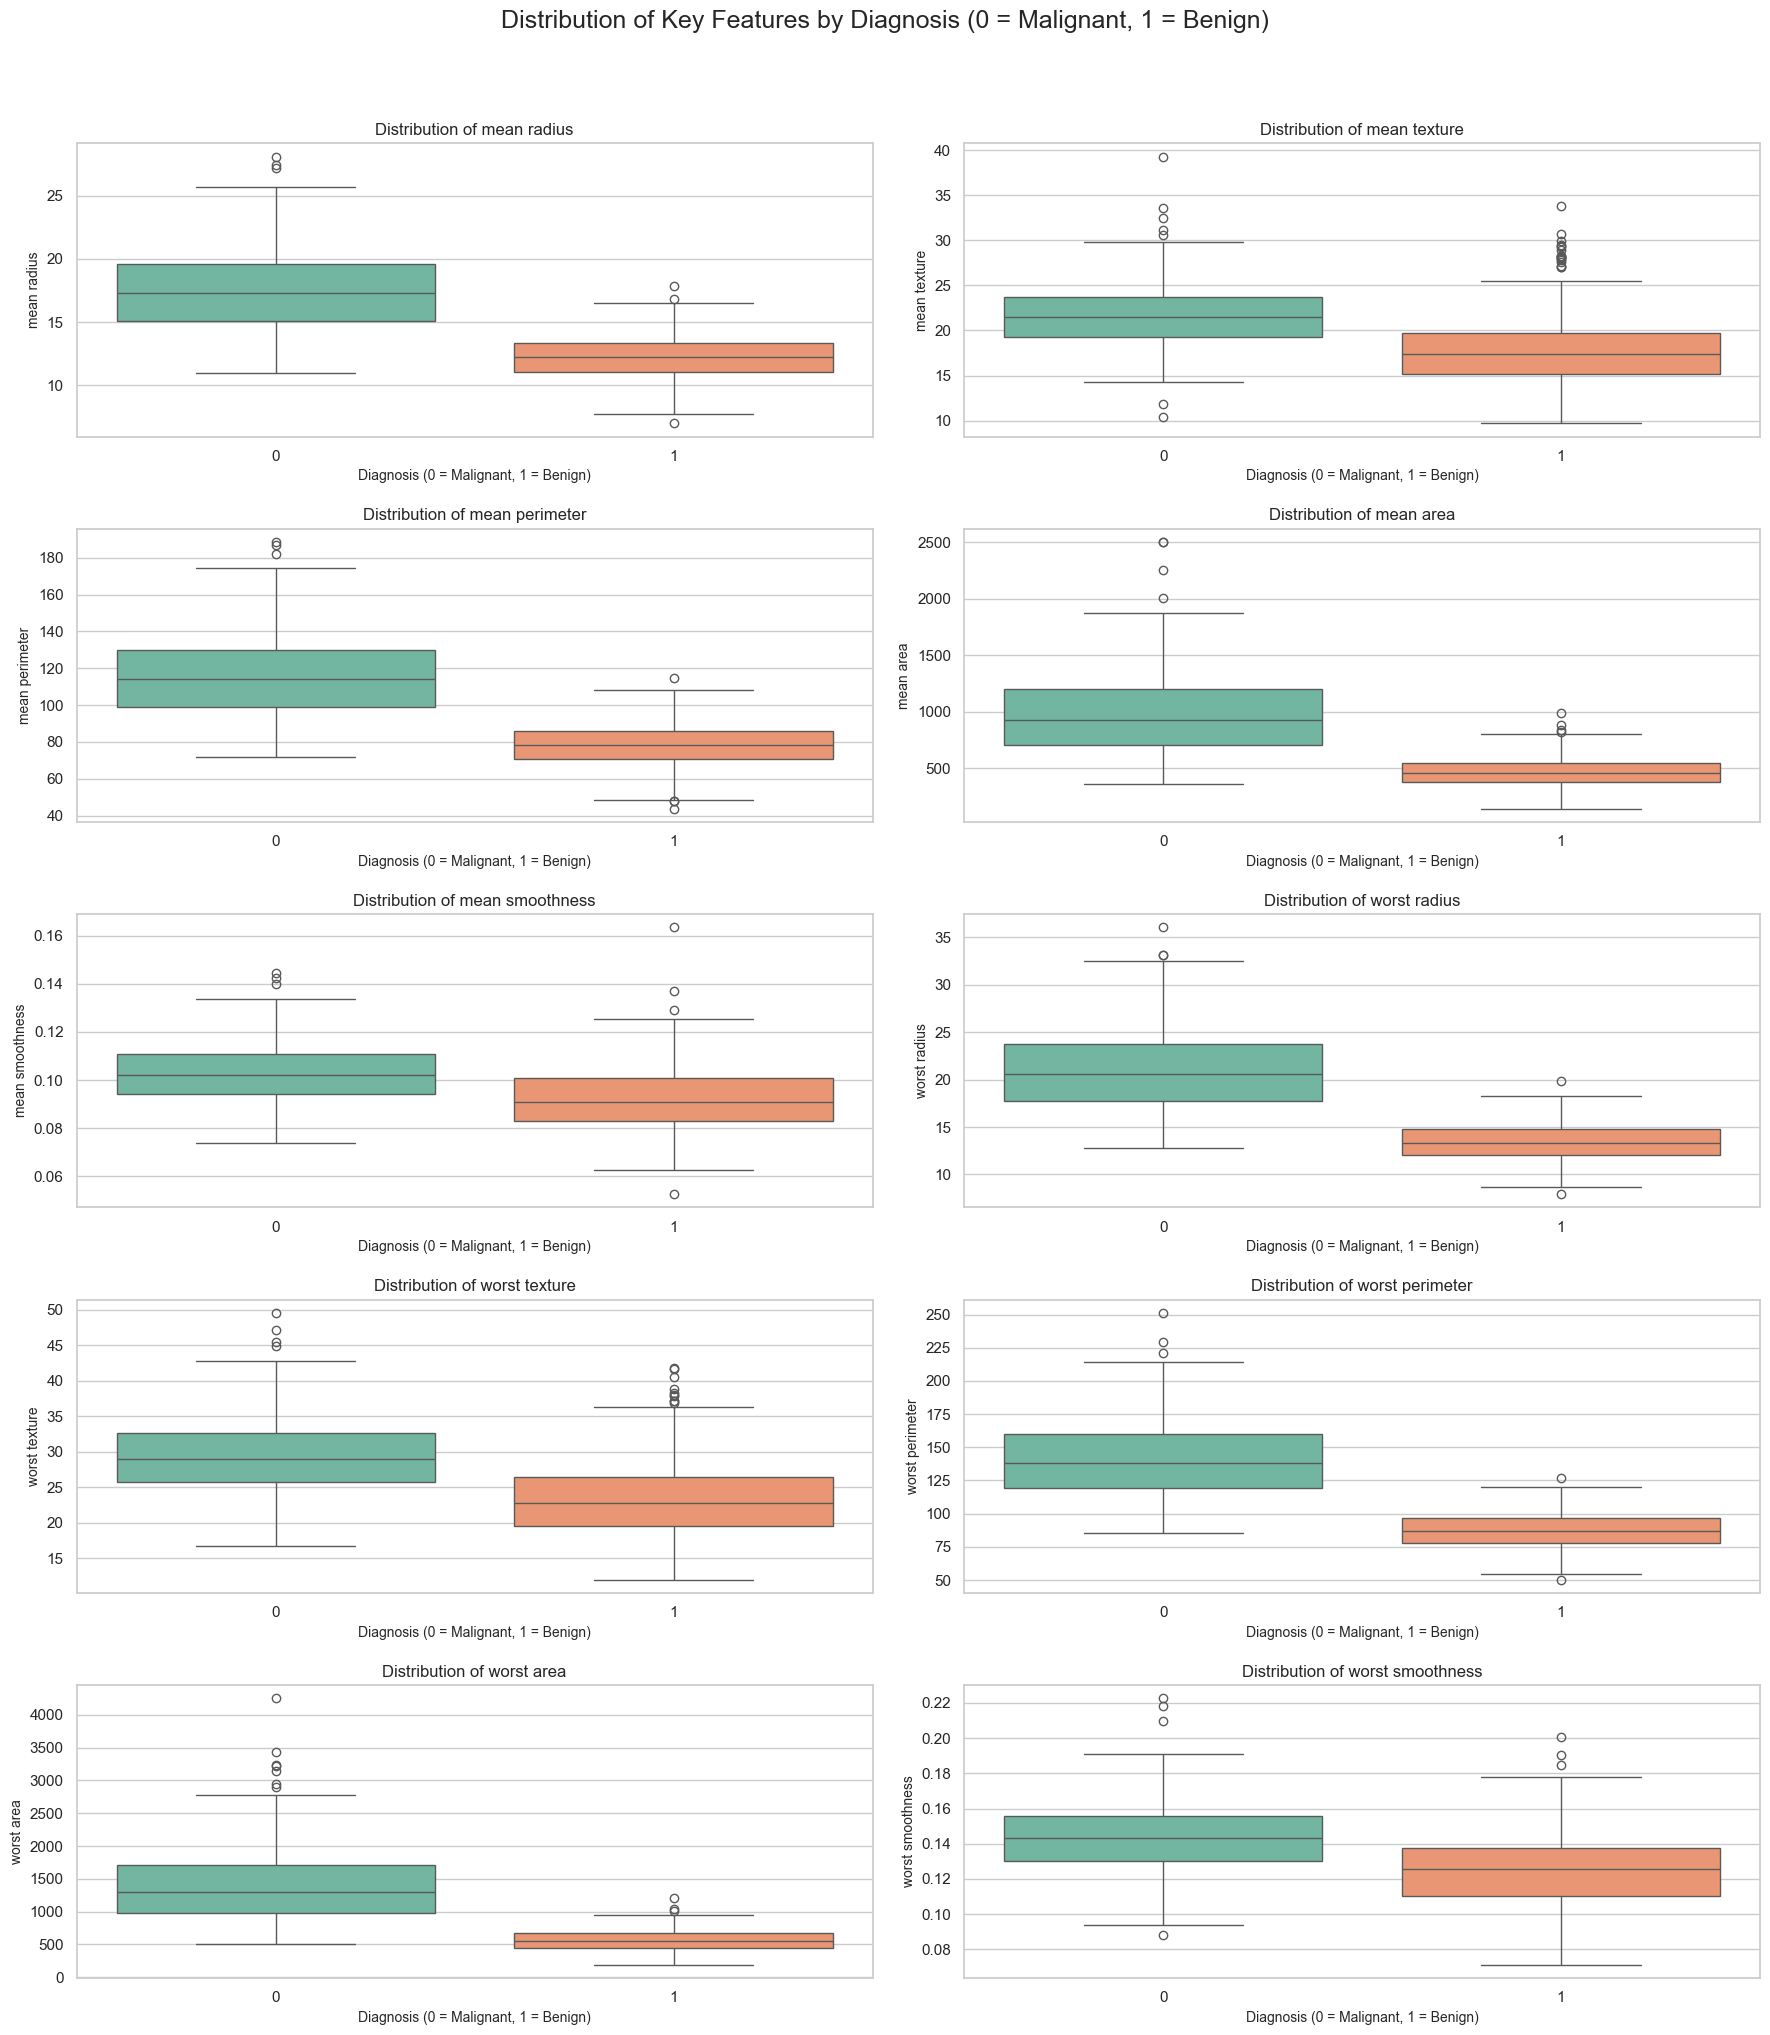

In [22]:
#  Boxplot of Key Features
# ---------------------------------------
# This step visualizes the distribution of selected features grouped by the target label.
# Boxplots show the median, quartiles, and potential outliers in the data.

# Selected key features based on correlation analysis or domain importance
key_features = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness'
]

# Set the figure size large enough to accommodate multiple subplots
plt.figure(figsize=(18, 20))
plt.suptitle("Distribution of Key Features by Diagnosis (0 = Malignant, 1 = Benign)", fontsize=18, y=1.02)

# Create a boxplot for each feature to visualize how it differs between malignant and benign cases
for i, feature in enumerate(key_features):
    plt.subplot(5, 2, i + 1)  # Arrange subplots in 5 rows and 2 columns
    sns.boxplot(x='target', y=feature, data=df, palette='Set2')  # Use Seaborn for clean boxplots
    plt.xlabel("Diagnosis (0 = Malignant, 1 = Benign)", fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.tight_layout(pad=1.5)  # Adjust spacing between subplots

plt.show()


## PairPlot and Multivariable Visualization

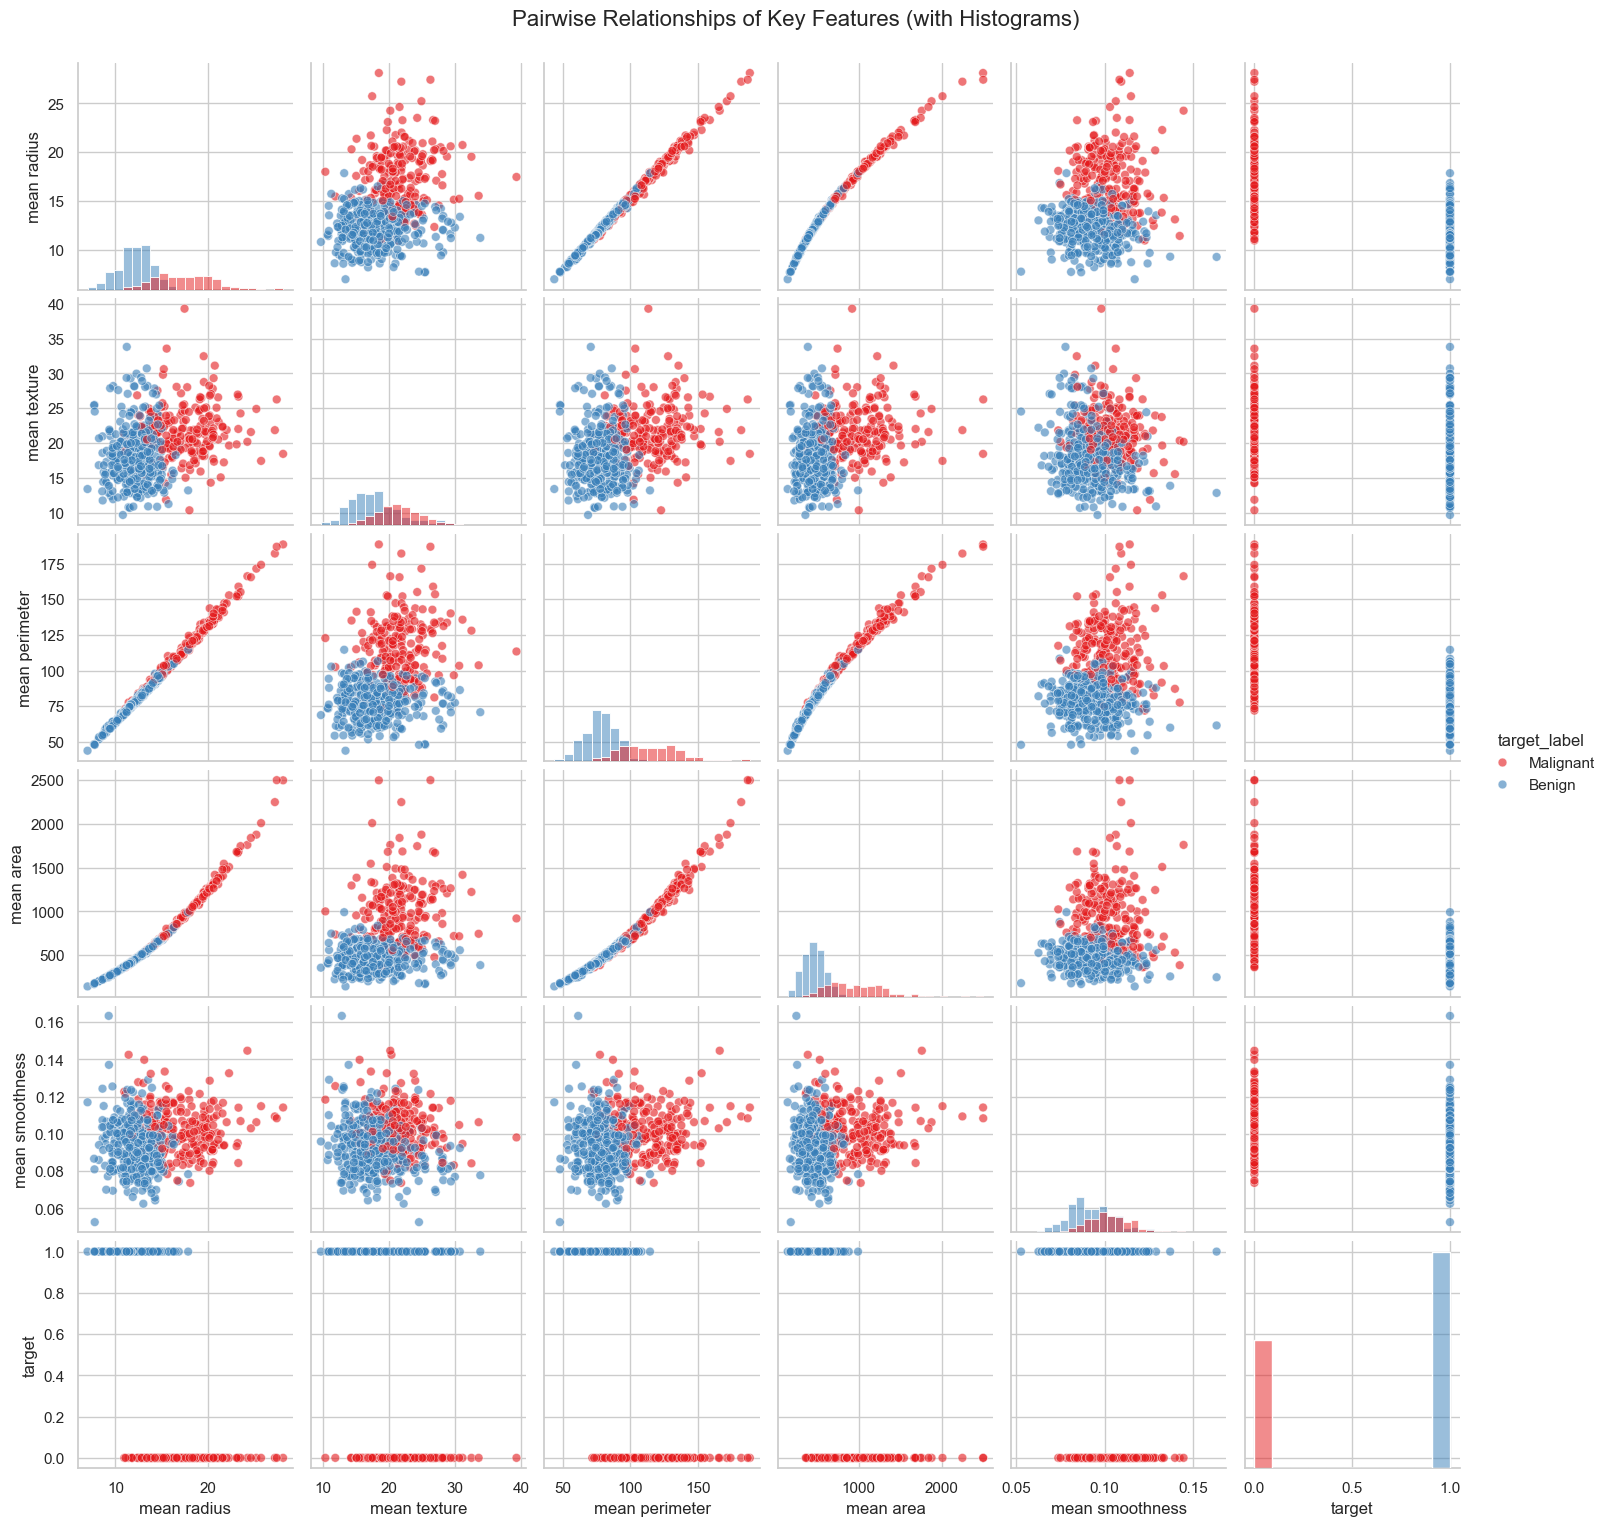

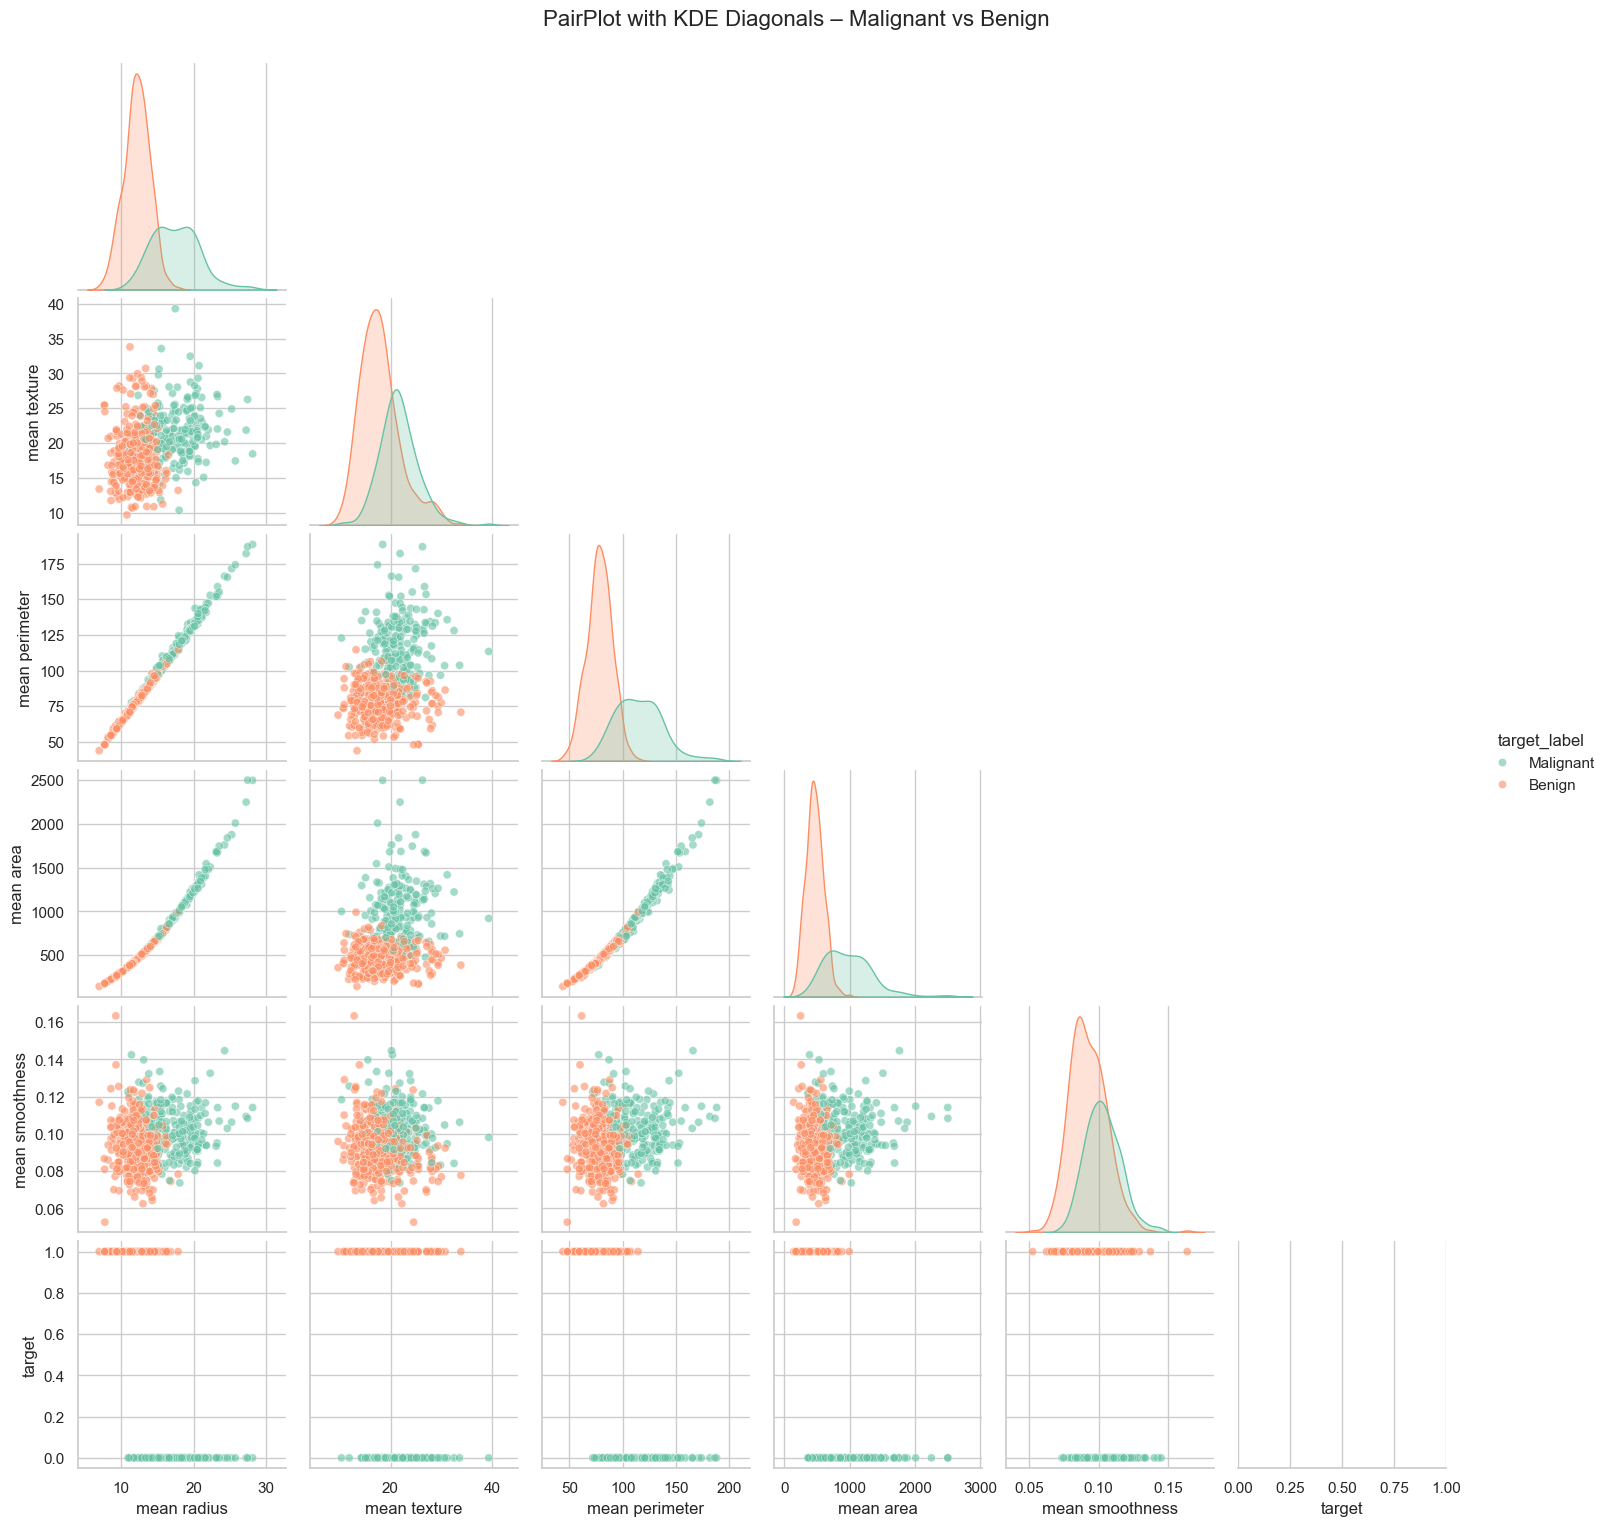

In [23]:
#  PairPlot and Multivariable Visualization
# -------------------------------------------------------------
# Pair plots help us to understand the relationships between multiple variables simultaneously.
# Especially useful for visualizing class separation (Malignant vs. Benign) across multiple features.

# Choose a subset of features for visualization
# -------------------------------------------------------------
# Since plotting all 30 features would be overwhelming, we select a few that had strong correlation with the target.
pairplot_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']

# Create a new DataFrame containing only the selected features
pairplot_df = df[pairplot_features].copy()

#  Map target values to class labels for better interpretation in plots
# -------------------------------------------------------------
# Instead of showing 0 and 1, we replace them with 'Malignant' and 'Benign' for readability in the legend.
pairplot_df['target_label'] = pairplot_df['target'].map({0: 'Malignant', 1: 'Benign'})

#  Create PairPlot using histogram on diagonals
# -------------------------------------------------------------
# This version uses histograms on the diagonal, and scatterplots on the off-diagonal.
# It's helpful for observing both individual feature distributions and their pairwise relationships.

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Set clean grid style for the plots

pairplot1 = sns.pairplot(pairplot_df,
                         hue='target_label',        # Color code by class label
                         diag_kind='hist',          # Histogram on diagonal
                         palette='Set1',            # Color palette
                         plot_kws={'alpha': 0.6, 's': 40})  # Transparency and point size

pairplot1.fig.suptitle('Pairwise Relationships of Key Features (with Histograms)', fontsize=16, y=1.02)
plt.show()


#  Create PairPlot using KDE (Kernel Density Estimation) on diagonals
# -------------------------------------------------------------
# KDE provides a smoothed estimate of the distribution.
# The 'corner=True' option helps reduce clutter by showing only the lower triangle of the matrix.

pairplot2 = sns.pairplot(pairplot_df,
                         hue='target_label',
                         diag_kind='kde',            # KDE instead of histogram
                         palette='Set2',
                         corner=True,                # Only plot lower triangle
                         plot_kws={'alpha': 0.6, 's': 35})

pairplot2.fig.suptitle('PairPlot with KDE Diagonals – Malignant vs Benign', fontsize=16, y=1.02)
plt.show()


## Preprocessing

In [24]:
#  Preprocessing

# Separate the features (X) and the target variable (y)
# X will contain all the feature columns except 'target'
X = df.drop('target', axis=1)  # axis=1 means we're dropping a column, not a row

# y will contain the target labels (0 = malignant, 1 = benign)
y = df['target']  # This is what we want to predict

# Feature Scaling
# Most machine learning algorithms perform better when features are on the same scale
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on X and transform it
X_scaled = scaler.fit_transform(X)  # The result is a NumPy array with scaled features

#  Split the dataset

# Split the data into training and testing sets
# 80% of the data is used for training and 20% for testing
# random_state ensures reproducibility of the split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# After this step:
# - X_train and y_train will be used to train the model
# - X_test and y_test will be used to evaluate the model's performance


## Model Training

In [25]:
#  Model Training

# Create a Random Forest Classifier model
# - n_estimators=100: The number of trees in the forest.
# - max_depth=8: The maximum depth of each tree (limits complexity to avoid overfitting).
# - random_state=42: Ensures reproducibility (same results every time the code is run).
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Train the model using the training data
# X_train: scaled features used to train the model
# y_train: the actual labels (0 for benign, 1 for malignant)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, random_state=42)

## Prediction & Evaluation

In [26]:
#  Prediction & Evaluation

# Use the trained model to make predictions on the test dataset
# X_test: the input features for testing
# y_pred: the predicted labels (0 or 1) for each test instance
y_pred = model.predict(X_test)

# Evaluate the model using a Confusion Matrix
# This matrix shows how many predictions were correct vs. incorrect
# Rows = Actual classes, Columns = Predicted classes
# Format: [[True Negatives, False Positives], [False Negatives, True Positives]]
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print detailed classification metrics
# Includes:
# - Precision: of all predicted positives, how many are actually positive?
# - Recall (Sensitivity): of all actual positives, how many were correctly predicted?
# - F1-Score: harmonic mean of precision and recall (balance between them)
# - Accuracy: overall correctness of the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## sample prediction

In [27]:
# Assume the model is already trained as in the previous code
# And we want to manually input feature values for prediction

# Sample new input (replace these values with actual user input if needed)
columns =[ "mean radius","mean texture","mean perimeter","mean area","mean smoothness","mean compactness","mean concavity","mean concave points","mean symmetry","mean fractal dimension","radius error","texture error","perimeter error","area error","smoothness error","compactness error","concavity error","concave points error","symmetry error","fractal dimension error","worst radius","worst texture","worst perimeter","worst area","worst smoothness","worst compactness","worst concavity","worst concave points","worst symmetry","worst fractal dimension"]
data = (13.08,15.71,85.63,520.0,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183)
df = pd.DataFrame([data],columns=columns)
# Scale the new input data (use the same scaler fitted earlier)
new_data_scaled = scaler.transform(df)

# Make prediction
prediction = model.predict(new_data_scaled)[0]  # [0] to extract the class value

# Use if-else to interpret and print result
if prediction == 0:
    print("The tumor is predicted to be **Malignant (Cancerous)**")
else:
   print("The tumor is predicted to be **Benign (Non-cancerous)**")


The tumor is predicted to be **Benign (Non-cancerous)**


## Final Comments

In [28]:
#  Final Comments

# Print a final summary message about model performance
# This helps communicate the overall result of the project in a human-readable way
# It highlights the practical value of using Random Forest for tumor classification
print("Random Forest achieved high accuracy. This model can effectively distinguish between benign and malignant tumors.")


Random Forest achieved high accuracy. This model can effectively distinguish between benign and malignant tumors.
